In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Dimension Reduction

## Random projection

In [2]:
from sklearn import random_projection, datasets, metrics

In [3]:
random_projection.johnson_lindenstrauss_min_dim(10000)

7894

In [4]:
rdata = datasets.make_blobs(n_samples=200, n_features=10000, centers=2, cluster_std=0.1)
data = rdata[0]
print data.shape

(200L, 10000L)


In [5]:
rp_grp = random_projection.GaussianRandomProjection()
data_new = rp_grp.fit_transform(data)
print data_new.shape

(200L, 4541L)


In [6]:
result = []
for i in range(data.shape[0]-1):
    for j in range(i+1, data.shape[0]):
        result.append((metrics.pairwise.distance.euclidean(data[i,:], data[j,:]), 
                       metrics.pairwise.distance.euclidean(data_new[i,:], data_new[j,:])))
result = np.array(result)
result.shape

(19900, 2)

/Users/pwu/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


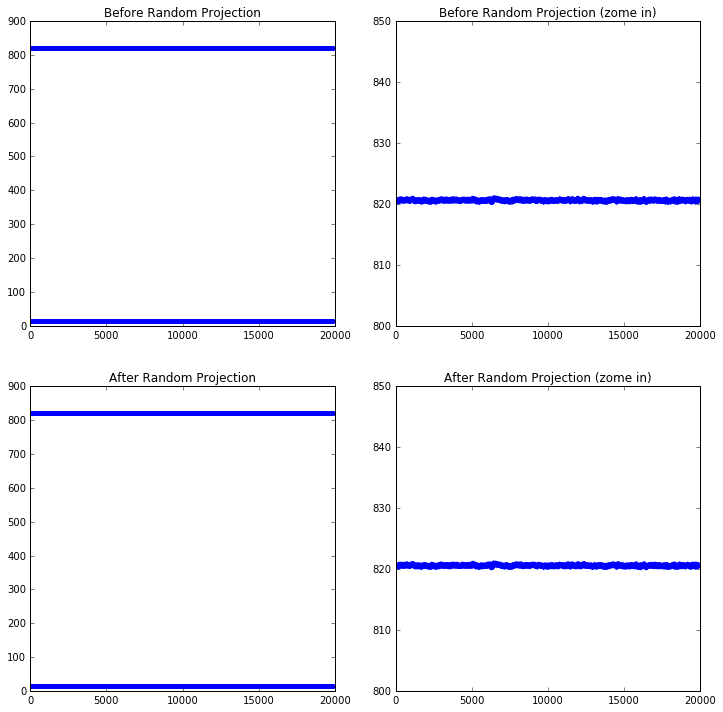

In [7]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.plot(result[:,0], '.')
ax1.set_title("Before Random Projection")

ax2 = fig.add_subplot(2,2,2)
ax2.plot(result[:,0], '.')
ax2.set_ylim([800, 850])
ax2.set_title("Before Random Projection (zome in)")

ax3 = fig.add_subplot(2,2,3)
ax3.plot(result[:,0], '.')
ax3.set_title("After Random Projection")

ax4 = fig.add_subplot(2,2,4)
ax4.plot(result[:,0], '.')
ax4.set_ylim([800, 850])
ax4.set_title("After Random Projection (zome in)")
fig.show()

In [ ]:
# Excercise: play with n_cluster = 3, how the distances looks different? 
# how about n_cluster = 4?

## PCA

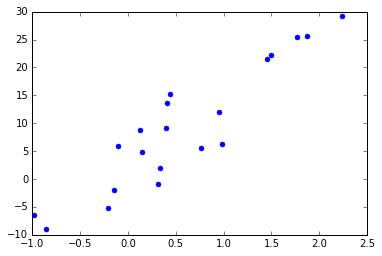

In [8]:
data = datasets.make_regression(n_samples=20, n_features=1, noise=5, random_state=0)
data[0].shape
plt.plot(data[0], data[1], '.', ms=10);

In [9]:
new_data = np.hstack([data[0], data[1].reshape(20, 1)])

In [10]:
from sklearn import decomposition

In [11]:
pca = decomposition.pca.PCA(n_components=1)
pca.fit(new_data)

PCA(copy=True, n_components=1, whiten=False)

In [12]:
pca.transform(new_data).ravel()

array([ 11.13911976,   0.05568138,   2.93362871,  18.28313778,
        15.69095102,  10.11691088,   3.38819406,  14.45522199,
         7.24583316, -13.14456379,  -2.79147461,   0.49193328,
       -12.44227119, -16.42905791,   4.30528255,  -4.35598065,
         3.64199274, -20.17526323,  -6.09311608, -16.31615987])

In [13]:
# How PCA works? 
# Step 1. data are normalized by mean
new_data1 = new_data - new_data.mean(axis=0)

In [14]:
# Step 2. Covarience matrix is calculated
cov_mat = np.cov(new_data.T)
print cov_mat

[[   0.76085347    9.10452333]
 [   9.10452333  128.57324166]]


In [15]:
# Step 3. Eig value & vectors are extracted
eig_value, eig_vec = np.linalg.eig(cov_mat)

In [16]:
# Step 4. Sort by the eig values
eig_vec_sorted = eig_vec[:,(-1.0*eig_value).argsort()]

In [17]:
# Calculate the projected result
np.dot(new_data1, eig_vec_sorted[:,0]) - pca.transform(new_data).ravel()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [18]:
# Try Iris dataset
data = datasets.load_iris()
X = data.data
Y = data.target

In [19]:
pca = decomposition.pca.PCA()
pca.fit(X)

PCA(copy=True, n_components=None, whiten=False)

In [20]:
X1 = X - X.mean(axis=0)
cov_mat = np.cov(X1.T)
eig_value, eig_vec = np.linalg.eig(cov_mat)
eig_vec_sorted = eig_vec[:,(-1.0*eig_value).argsort()]

In [21]:
#plt.plot(np.dot(X1, eig_vec_sorted[:,0]) - pca.transform(X)[:,0].ravel())
#plt.plot(np.dot(X1, eig_vec_sorted[:,1]) - pca.transform(X)[:,1].ravel())

In [22]:
# pca.explained_variance_ratio_

In [271]:
# plt.scatter(pca.transform(X1)[:,0], pca.transform(X1)[:,1], c=Y)

In [256]:
# Excercise: try run PCA for this data, see how it looks like: the transformed result & explained variance ratio
# changing the d, see how it (varience explained) looks like
N = 100
d = 10.
x = np.random.normal(size=N).reshape([N,1])
y = (np.random.normal(size=N) * d).reshape([N,1])
data = np.hstack([x,y])

## Isomap

In [23]:
from sklearn import manifold

In [24]:
mi = manifold.Isomap()
data = datasets.load_iris()
X = data.data
Y = data.target

In [25]:
mi.fit(X)

Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_neighbors=5,
    neighbors_algorithm='auto', path_method='auto', tol=0)

In [27]:
# plt.scatter(mi.transform(X)[:,0], mi.transform(X)[:,1], c=Y)

# Unsupervised Learning

## Gausian mixture model

In [28]:
from sklearn import mixture

In [29]:
# Generate data
N = 3
x0 = np.array([])
for i in range(N):
    x = np.random.normal(size=10) + 5*i
    x0 = np.hstack([x0, x])
x0 = x0.reshape((len(x0), 1))

In [30]:
# use GMM to do unsupervised learning
gmm = mixture.GMM(n_components=3)

In [31]:
# use iris data set, see performance for different measures
data = datasets.load_iris()
X = data.data
Y = data.target

gmm = mixture.GMM()

result = []
for n in range(2, 10):
    gmm.set_params(n_components=n)
    Yp = gmm.fit_predict(X)
    result.append([
            metrics.cluster.adjusted_rand_score(Y, Yp), 
            metrics.cluster.adjusted_mutual_info_score(Y, Yp),
            metrics.cluster.homogeneity_score(Y, Yp), 
            metrics.cluster.completeness_score(Y, Yp),
            metrics.cluster.v_measure_score(Y, Yp), 
            metrics.cluster.silhouette_score(X, Yp)
            ])
result = np.array(result)

In [33]:
# explore the difference between scores

In [32]:
# Excercise: try following data sets, see how the different scores perform
data = datasets.make_blobs(n_samples=200, centers=5, random_state=0, cluster_std=0.4)
X = data[0]
Y = data[1]

## K-mean

In [ ]:
# this is like the dice-problem in investiment banking interview ...

In [35]:
# sample datasets
data = datasets.make_blobs(n_samples=200, centers=5, random_state=0, cluster_std=0.4)
X = data[0]
Y = data[1]

In [36]:
from sklearn import cluster

In [37]:
# use iris data set, see performance for different measures

result = []
km = cluster.KMeans()
for n in range(2, 10):
    km.set_params(n_clusters=n)
    km.fit(X)
    result.append([
            metrics.cluster.adjusted_rand_score(Y, Yp), 
            metrics.cluster.adjusted_mutual_info_score(Y, Yp),
            metrics.cluster.homogeneity_score(Y, Yp), 
            metrics.cluster.completeness_score(Y, Yp),
            metrics.cluster.v_measure_score(Y, Yp), 
            metrics.cluster.silhouette_score(X, km.predict(X))
            ])
result = np.array(result)

In [38]:
# Excercise: Check the K-mean's different random state & max_iteration number
# change different centers # and KMean cluster # 

In [ ]:
# sample datasets
data = datasets.make_blobs(n_samples=2000, n_features=2, centers=2, random_state=0, cluster_std=1.0)
X = data[0]
Y = data[1]

## Hierarchical clustering

In [39]:
# Hierarchical clustering is a general family of clustering algorithms 
# that build nested clusters by merging or splitting them successively.

In [40]:
# AgglomerativeClustering

In [41]:
acm = cluster.AgglomerativeClustering()
acm.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=2, n_components=None,
            pooling_func=<function mean at 0x10712acf8>)

In [42]:
acm.n_leaves_

200

In [43]:
X.shape

(200, 2)

In [44]:
# DBSCAN
# The DBSCAN algorithm views clusters as areas of high density separated by areas of low density.

In [45]:
dbscan = cluster.DBSCAN()
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    min_samples=5, p=None, random_state=None)

In [46]:
# use iris data set, see performance for different measures

result = []
dbscan = cluster.DBSCAN()
Yp = dbscan.fit_predict(X)
print metrics.cluster.adjusted_rand_score(Y, Yp)
print metrics.cluster.adjusted_mutual_info_score(Y, Yp)
print metrics.cluster.homogeneity_score(Y, Yp)
print metrics.cluster.completeness_score(Y, Yp)
print metrics.cluster.v_measure_score(Y, Yp)
print metrics.cluster.silhouette_score(X, km.predict(X))
# result = np.array(result)

0.97525062733
0.952717810032
0.993012030594
0.954229759891
0.973234691401
0.45103142445


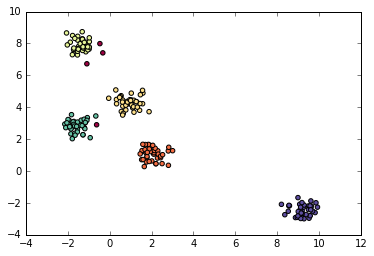

In [47]:
plt.scatter(X[:,0], X[:,1], c=Yp, cmap='Spectral')

In [ ]:
# K-mean, Gaussian Mixture, DBSCAN, AggregrateClustering

In [ ]:
# Speed test

In [60]:
Nc = 5
data = datasets.make_blobs(n_samples=100000, n_features=100, centers=Nc, random_state=0)
X = data[0]
Y = data[1]

In [61]:
%%time
model = cluster.KMeans(n_clusters=Nc)
model.fit(X)
result = model.predict(X)

CPU times: user 2.1 s, sys: 39.9 ms, total: 2.14 s
Wall time: 1.13 s


In [58]:
%%time
model = cluster.AgglomerativeClustering(n_clusters=Nc)
model.fit(X)
result = model.labels_

CPU times: user 4.83 s, sys: 10.3 ms, total: 4.84 s
Wall time: 4.83 s


In [62]:
%%time
model = cluster.DBSCAN()
model.fit(X)
result = model.labels_

CPU times: user 25.5 s, sys: 290 ms, total: 25.8 s
Wall time: 25.5 s


In [52]:
from sklearn import mixture

In [63]:
%%time
model = mixture.GMM()
model.fit(X)
result = model.predict(X)

CPU times: user 969 ms, sys: 107 ms, total: 1.08 s
Wall time: 811 ms


# Novelty & Outlier Detection

In [64]:
## one-class SVM

In [65]:
from sklearn import svm

In [66]:
X = np.random.normal(size=100)
X = X[abs(X)<3]
X1 = np.random.normal(loc=3.0, size=10)
X2 = np.concatenate([X,X1])

print X.shape, X1.shape, X2.shape

(99,) (10,) (109,)


In [67]:
model = svm.OneClassSVM(nu=0.1, gamma=0.1)

In [68]:
model.fit(X.reshape(-1,1))

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

(array([ 4.,  0.,  0.,  0.,  0.,  1.,  8.,  1.,  1.,  2.]),
 array([-2.21035851, -1.46193617, -0.71351383,  0.03490852,  0.78333086,
         1.5317532 ,  2.28017554,  3.02859789,  3.77702023,  4.52544257,
         5.27386492]),
 <a list of 10 Patch objects>)

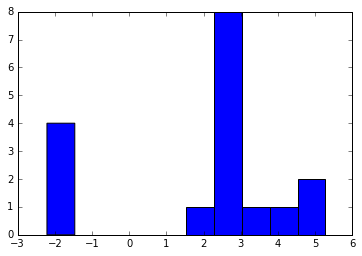

In [69]:
plt.hist(X2[model.predict(X2.reshape(-1,1)) == -1])

(array([  6.,   6.,  11.,   6.,  16.,  15.,  12.,   7.,   9.,   4.]),
 array([-1.65219466, -1.30327581, -0.95435696, -0.60543811, -0.25651926,
         0.09239959,  0.44131843,  0.79023728,  1.13915613,  1.48807498,
         1.83699383]),
 <a list of 10 Patch objects>)

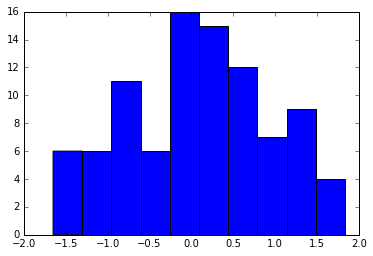

In [70]:
plt.hist(X2[model.predict(X2.reshape(-1,1)) == 1])

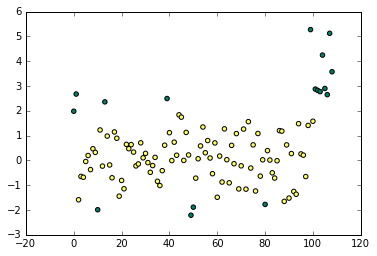

In [71]:
plt.scatter(range(len(X2)), X2, c=model.predict(X2.reshape(-1,1)), cmap='summer')

# Ensemble Models

In [ ]:
## Bagging, Random forest, Adaptive boosting & Gradient boosting

In [38]:
from sklearn import ensemble

# Averaging: build several estimators independently and then to average their predictions
## Bagging: randomness in data
## Random forest: further randomness in model at each level split
## https://www.quora.com/How-does-randomization-in-a-random-forest-work?redirected_qid=212859

# Boosting: base estimators are built sequentially and one tries to reduce the bias of the combined estimator
## Adaboost: adaptive change point weight
## Gradientboost: negative functional gradient

In [42]:
ensemble.BaggingClassifier?

In [43]:
ensemble.RandomForestClassifier?